Creating Cohorts of Songs in Spotify
Spotify is a Swedish audio streaming and media service provider.The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features.Each cohort  would contain similar types of songs. Perform exploratory data analysis and cluster analysis to create cohort of songs.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the spotify data set

In [2]:
spotifydatadf=pd.read_csv(r'C:\Users\nithi\Desktop\Renu\Data Science\Machine Learning\Python Notebook\Course End Project\1689942861_rolling_stones_spotify\rolling_stones_spotify.csv')

In [3]:
spotifydatadf.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [4]:
##Dropping unnamed column
spotifydatadf=spotifydatadf.drop('Unnamed: 0',axis=1)

In [ ]:
spotifydatadf.info()
## Dataset has 1610 rows and 16 columns. All the columns have 1610 non-null count indicating no missing values.
## Datatypes- object,float and int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [ ]:
##Checking for missing values
spotifydatadf.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [ ]:
##Checking for duplicate records
duplicates=spotifydatadf[spotifydatadf.duplicated()]
print(f"Duplicate rows:",len(duplicates))
##No duplicate rows/observations found.

Duplicate rows: 0


In [ ]:
##Checking for columns having only one value
for col in spotifydatadf.columns:
    if spotifydatadf[col].nunique==1:
        constantcol=[col]
        print("constantcol:",constantcol)
# No column is having only one unique value.


In [ ]:
## CHecking for hig cardinality columns and dropping them as these are of no use in analysis

threshold = 0.95
high_cardinality_cols = [
    col for col in spotifydatadf.select_dtypes(include='object').columns
    if spotifydatadf[col].nunique() / spotifydatadf.shape[0] > threshold
]
print(f"🆔 High-cardinality columns (possible IDs): {high_cardinality_cols}")

🆔 High-cardinality columns (possible IDs): ['id', 'uri']


In [29]:
spotifydatadf=spotifydatadf.drop(['id', 'uri'],axis=1)
spotifydatadf.columns

Index(['name', 'album', 'release_date', 'track_number', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms'],
      dtype='object')

Splitting data into numeric and object columns for data preprocessing.

In [30]:
numcols=spotifydatadf.select_dtypes(include=np.number)
numcols.columns

Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms'],
      dtype='object')

In [31]:
objcols=spotifydatadf.select_dtypes(include=['object'])
objcols.columns

Index(['name', 'album', 'release_date'], dtype='object')

In [8]:
numcols.describe()

track_number  acousticness  danceability       energy  \
count   1610.000000   1610.000000   1610.000000  1610.000000   
mean       8.613665      0.250475      0.468860     0.792352   
std        6.560220      0.227397      0.141775     0.179886   
min        1.000000      0.000009      0.104000     0.141000   
25%        4.000000      0.058350      0.362250     0.674000   
50%        7.000000      0.183000      0.458000     0.848500   
75%       11.000000      0.403750      0.578000     0.945000   
max       47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

In [9]:
numcols.skew()

track_number        1.777241
acousticness        0.868785
danceability        0.162052
energy             -0.941379
instrumentalness    1.667856
liveness            0.220033
loudness           -0.888034
speechiness         3.230335
tempo               0.361867
valence            -0.195988
popularity          0.883930
duration_ms         1.924778
dtype: float64

In [10]:
numcols.kurt()

track_number         5.024163
acousticness        -0.191756
danceability        -0.533345
energy               0.068139
instrumentalness     1.344896
liveness            -1.603154
loudness             1.715760
speechiness         20.395984
tempo                0.004042
valence             -0.846018
popularity           1.754243
duration_ms          6.838507
dtype: float64

In [32]:
##Checking for outliers 
Q1 = numcols.quantile(0.25)
Q3 = numcols.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5*IQR
outliers_iqr = ((numcols < (Q1 - 1.5 * IQR)) | (numcols > (Q3 + 1.5 * IQR)))

print("IQR-based outliers per column:")
print(outliers_iqr.sum())

IQR-based outliers per column:
track_number         77
acousticness          4
danceability          0
energy                8
instrumentalness    272
liveness              0
loudness             14
speechiness          92
tempo                34
valence               0
popularity           48
duration_ms          76
dtype: int64


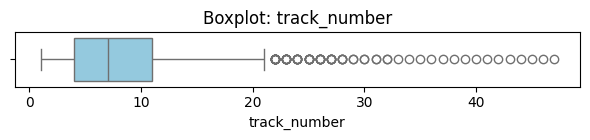

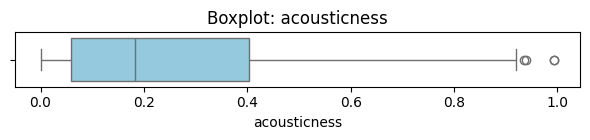

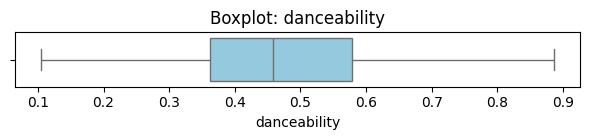

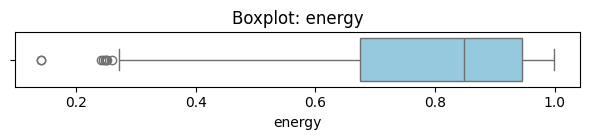

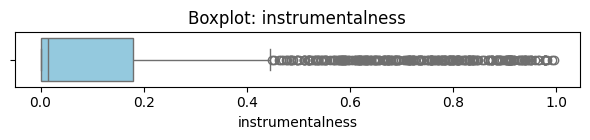

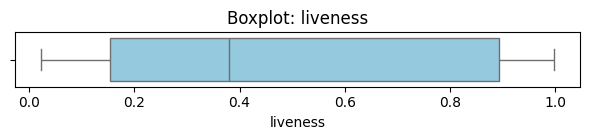

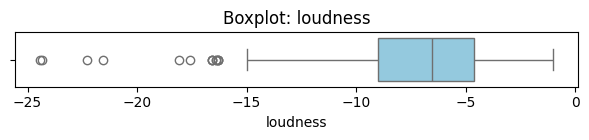

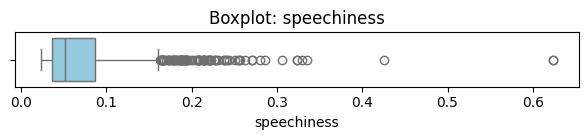

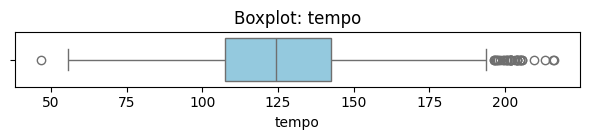

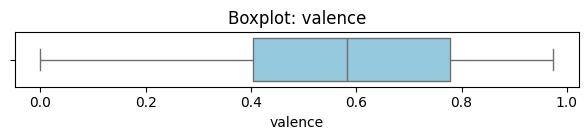

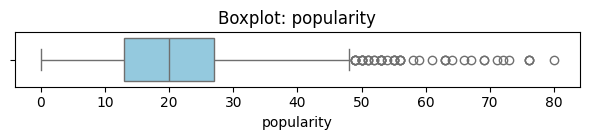

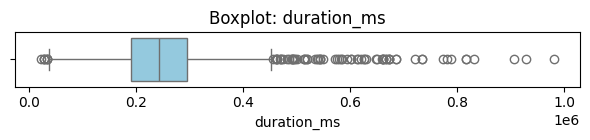

In [33]:
for col in numcols.columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=numcols[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

In [11]:
numcols.cov()


track_number  acousticness  danceability       energy  \
track_number          43.036482     -0.053220     -0.104172     0.113659   
acousticness          -0.053220      0.051709      0.002257    -0.014882   
danceability          -0.104172      0.002257      0.020100    -0.007665   
energy                 0.113659     -0.014882     -0.007665     0.032359   
instrumentalness      -0.005023      0.003857     -0.001246     0.005976   
liveness               0.431355     -0.009347     -0.025558     0.032102   
loudness               1.980522     -0.161412     -0.105866     0.375949   
speechiness            0.013758     -0.000256     -0.002362     0.003875   
tempo                 -4.590048     -1.136761     -1.344491     1.061651   
valence               -0.158636     -0.007299      0.017908     0.001923   
popularity           -11.830168      0.305319      0.248777    -0.128027   
duration_ms       111191.390093    963.914787  -3379.669619  2901.250741   

                  instrumentalness      liveness      loudness  speechiness  \
track_number             -0.005023      0.431355      1.980522     0.013758   
acousticness              0.003857     -0.009347     -0.161412    -0.000256   
danceability             -0.001246     -0.025558     -0.105866    -0.002362   
energy                    0.005976      0.032102      0.375949     0.003875   
instrumentalness          0.076313      0.000856      0.010358     0.000137   
liveness                  0.000856      0.121871      0.341820     0.007210   
loudness                  0.010358      0.341820      8.964052     0.029356   
speechiness               0.000137      0.007210      0.029356     0.002666   
tempo                     0.088520      1.110906      9.876089     0.290835   
valence                   0.006611     -0.028050     -0.019089    -0.004773   
popularity               -0.036428     -0.893001      5.816151    -0.087738   
duration_ms           -4117.919334  11524.833486  71862.505959   640.701053   

                        tempo      valence    popularity   duration_ms  
track_number        -4.590048    -0.158636    -11.830168  1.111914e+05  
acousticness        -1.136761    -0.007299      0.305319  9.639148e+02  
danceability        -1.344491     0.017908      0.248777 -3.379670e+03  
energy               1.061651     0.001923     -0.128027  2.901251e+03  
instrumentalness     0.088520     0.006611     -0.036428 -4.117919e+03  
liveness             1.110906    -0.028050     -0.893001  1.152483e+04  
loudness             9.876089    -0.019089      5.816151  7.186251e+04  
speechiness          0.290835    -0.004773     -0.087738  6.407011e+02  
tempo              854.596520     0.003775    -22.182304  4.638989e+03  
valence              0.003775     0.053478      0.187751 -6.133649e+03  
popularity         -22.182304     0.187751    154.426834  9.975924e+04  
duration_ms       4638.989156 -6133.649451  99759.241439  1.173614e+10

In [12]:
numcols.corr()

track_number  acousticness  danceability    energy  \
track_number          1.000000     -0.035675     -0.112004  0.096314   
acousticness         -0.035675      1.000000      0.070017 -0.363819   
danceability         -0.112004      0.070017      1.000000 -0.300536   
energy                0.096314     -0.363819     -0.300536  1.000000   
instrumentalness     -0.002772      0.061403     -0.031812  0.120261   
liveness              0.188351     -0.117739     -0.516387  0.511188   
loudness              0.100835     -0.237083     -0.249406  0.698039   
speechiness           0.040617     -0.021774     -0.322684  0.417214   
tempo                -0.023934     -0.171003     -0.324398  0.201885   
valence              -0.104567     -0.138803      0.546210  0.046217   
popularity           -0.145115      0.108046      0.141205 -0.057272   
duration_ms           0.156455      0.039128     -0.220045  0.148876   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
track_number             -0.002772  0.188351  0.100835     0.040617 -0.023934   
acousticness              0.061403 -0.117739 -0.237083    -0.021774 -0.171003   
danceability             -0.031812 -0.516387 -0.249406    -0.322684 -0.324398   
energy                    0.120261  0.511188  0.698039     0.417214  0.201885   
instrumentalness          1.000000  0.008873  0.012524     0.009586  0.010961   
liveness                  0.008873  1.000000  0.327036     0.400018  0.108855   
loudness                  0.012524  0.327036  1.000000     0.189904  0.112837   
speechiness               0.009586  0.400018  0.189904     1.000000  0.192687   
tempo                     0.010961  0.108855  0.112837     0.192687  1.000000   
valence                   0.103480 -0.347451 -0.027571    -0.399751  0.000558   
popularity               -0.010612 -0.205845  0.156323    -0.136745 -0.061061   
duration_ms              -0.137599  0.304735  0.221558     0.114546  0.001465   

                   valence  popularity  duration_ms  
track_number     -0.104567   -0.145115     0.156455  
acousticness     -0.138803    0.108046     0.039128  
danceability      0.546210    0.141205    -0.220045  
energy            0.046217   -0.057272     0.148876  
instrumentalness  0.103480   -0.010612    -0.137599  
liveness         -0.347451   -0.205845     0.304735  
loudness         -0.027571    0.156323     0.221558  
speechiness      -0.399751   -0.136745     0.114546  
tempo             0.000558   -0.061061     0.001465  
valence           1.000000    0.065333    -0.244833  
popularity        0.065333    1.000000     0.074102  
duration_ms      -0.244833    0.074102     1.000000

<Axes: >

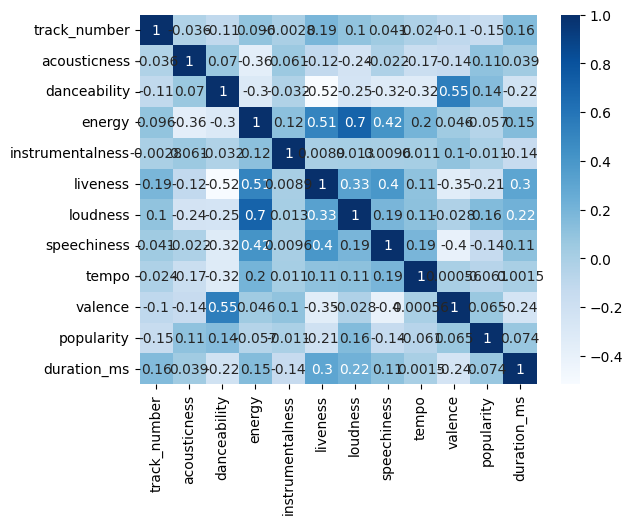

In [15]:
sns.heatmap(numcols.corr(),annot=True,cmap="Blues")

Could see strong correlation between valence and danceability and also energy and loudness.

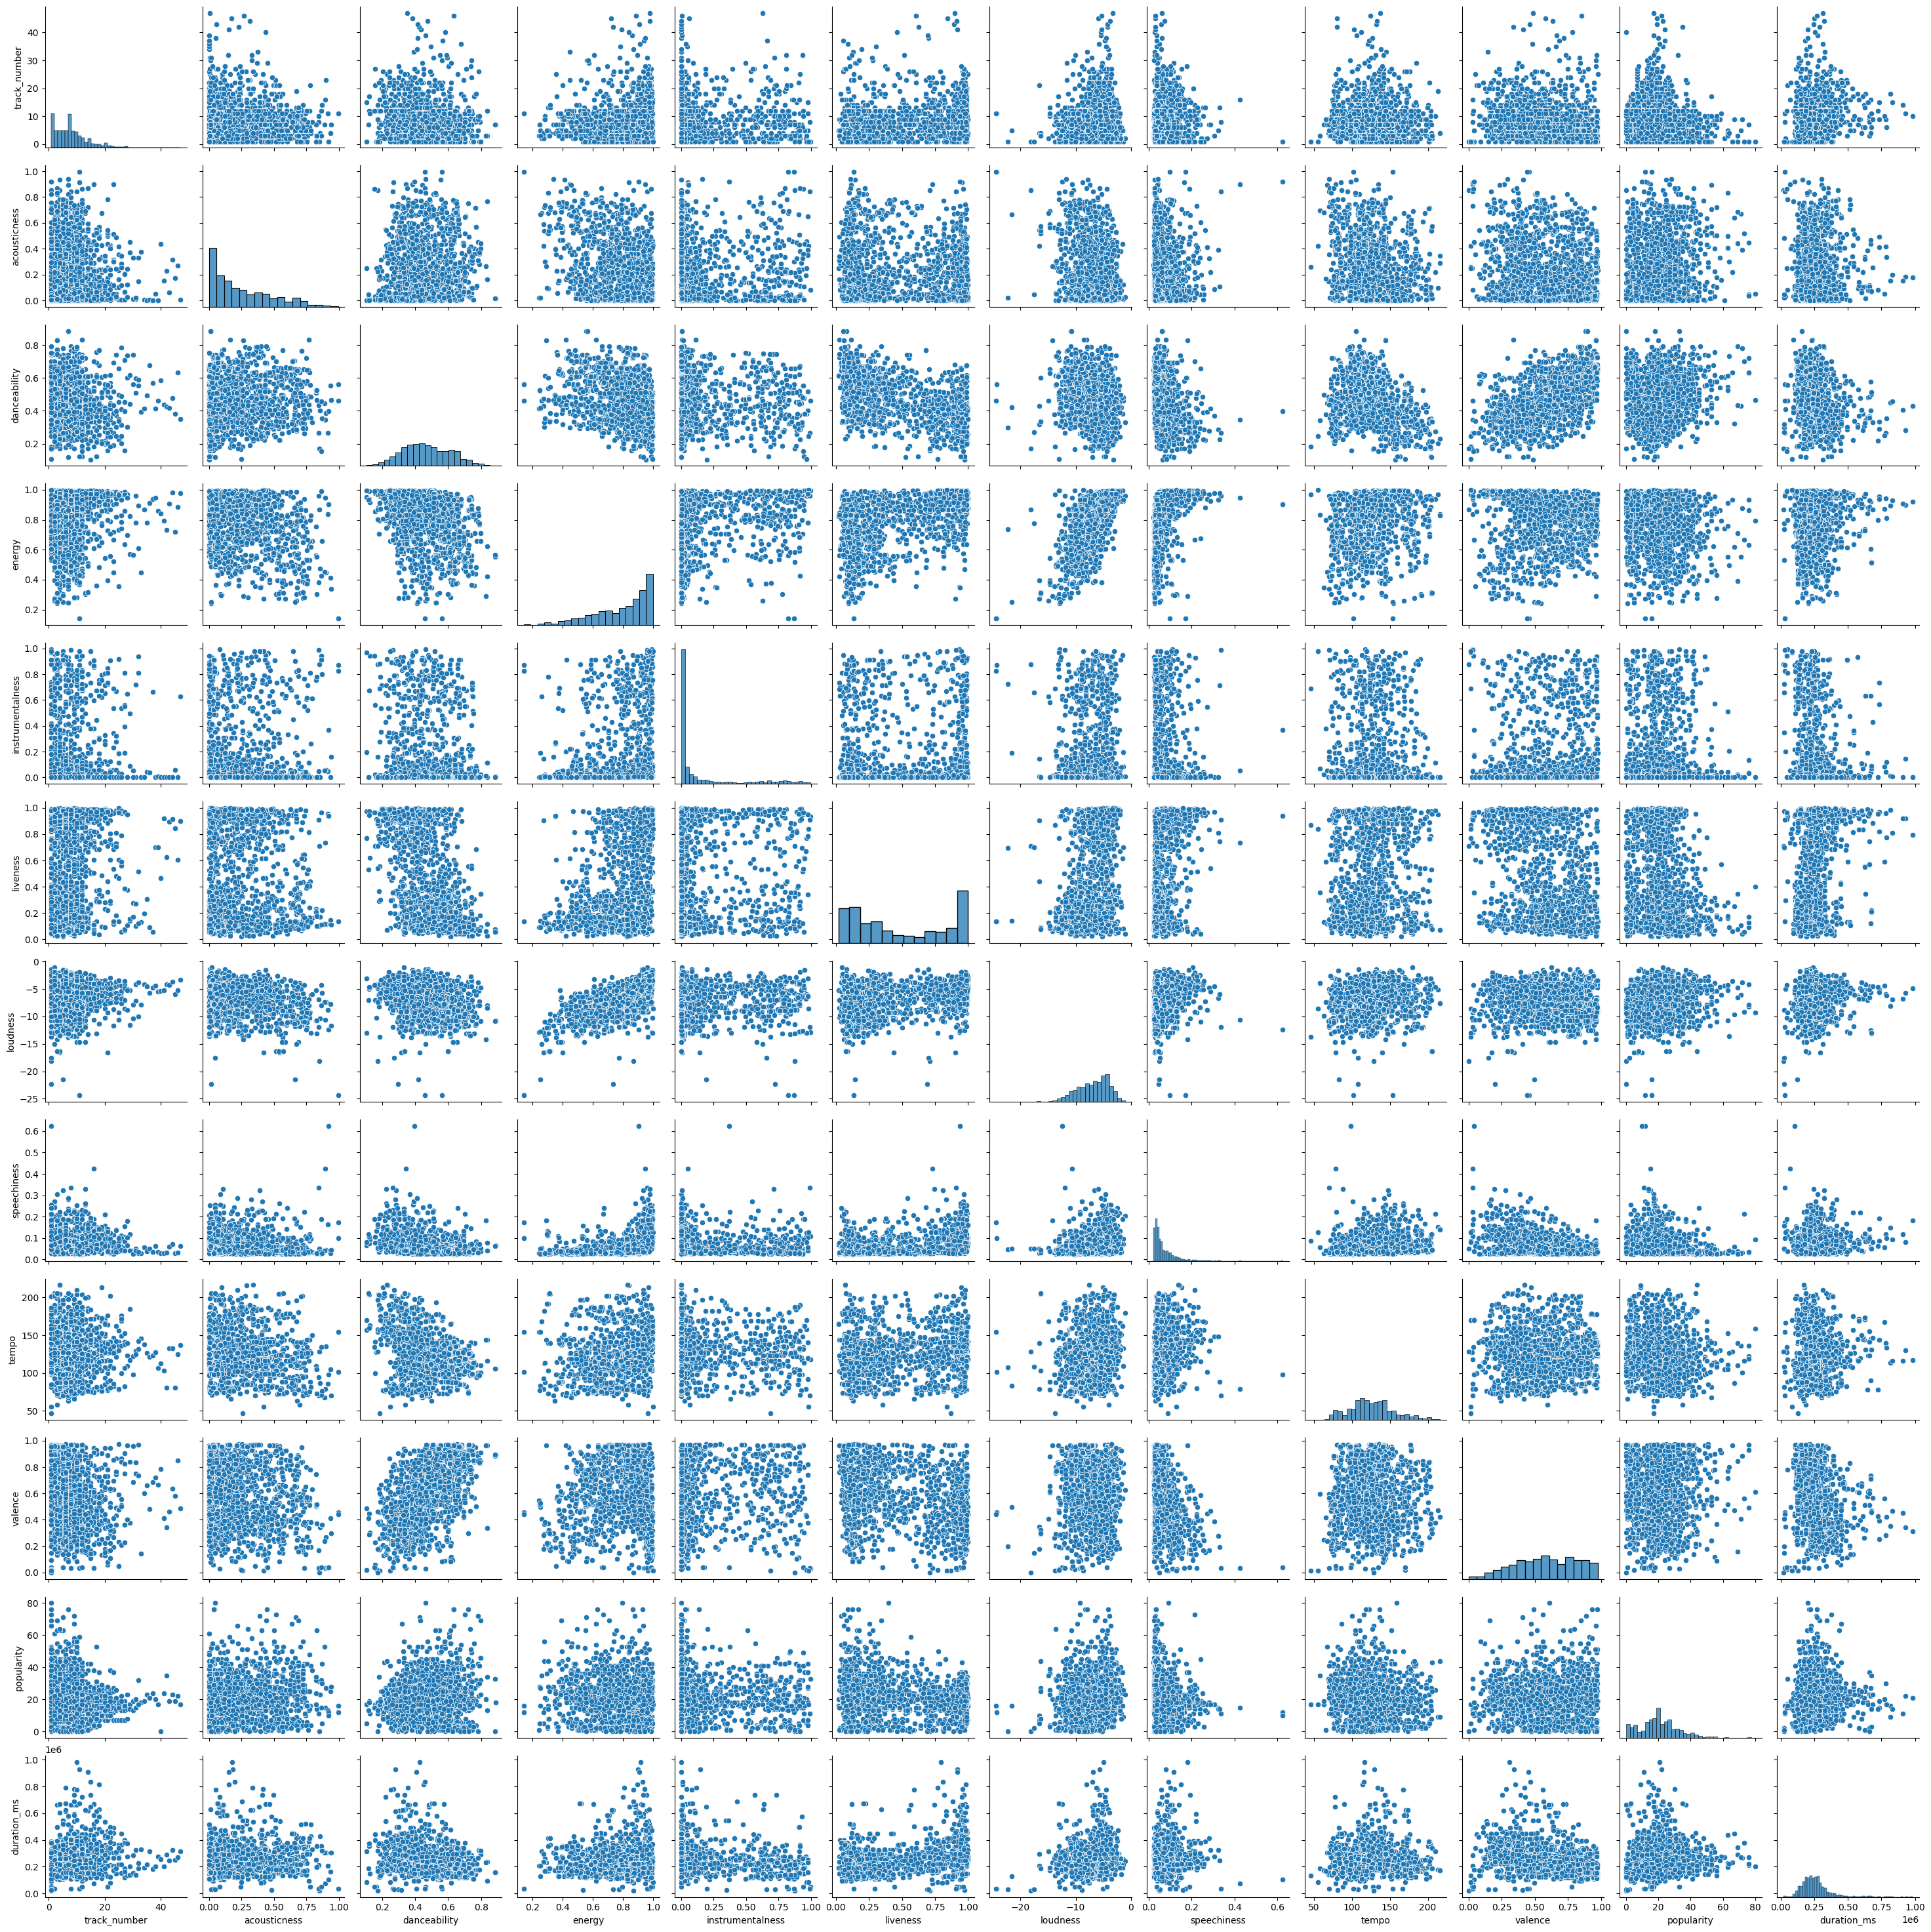

In [16]:
sns.pairplot(numcols)

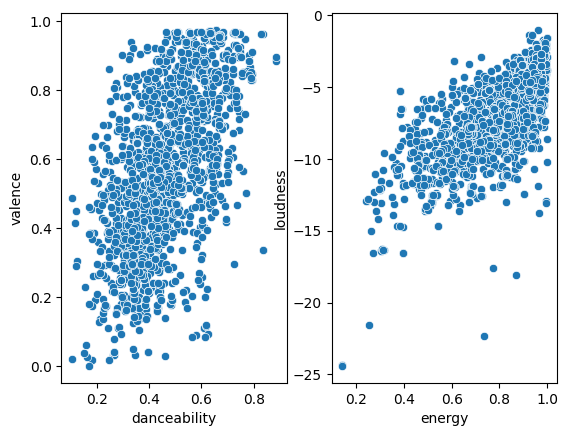

In [55]:
plt.subplot(121)
sns.scatterplot(x='danceability',y='valence',data=spotifydatadf)
plt.subplot(122)
sns.scatterplot(x='energy',y='loudness',data=spotifydatadf)
plt.show()

In [41]:
spotifydatadf['album'].nunique()

90

In [ ]:
album_wise_popularity=spotifydatadf.groupby('album')['popularity'].sum()
print(album_wise_popularity.sort_values(ascending=False))
print(type(album_wise_popularity))


album
Honk (Deluxe)                            1232
Tattoo You (Super Deluxe)                1008
Goats Head Soup (Deluxe)                  891
Some Girls (Deluxe Version)               852
Exile On Main Street (Deluxe Version)     839
                                         ... 
Get Yer Ya Yas Out                         56
Now!                                       44
Out Of Our Heads (UK Sequence)             31
Got Live if you want it!                    8
England's Newest Hit Makers                 7
Name: popularity, Length: 90, dtype: int64
<class 'pandas.core.series.Series'>


album
Honk (Deluxe)                1232
Tattoo You (Super Deluxe)    1008
Name: popularity, dtype: int64


C:\Users\nithi\AppData\Local\Temp\ipykernel_23080\953654539.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top2_album.values, y=top2_album.index, palette='viridis')


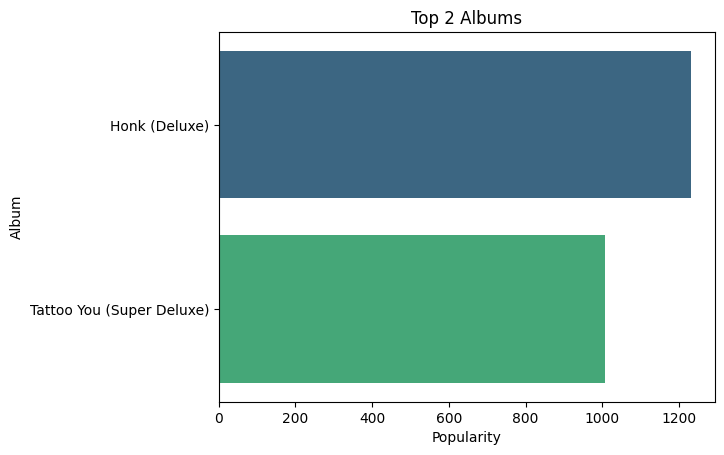

In [51]:

# Get top 2 albums by Popularity
top2_album = spotifydatadf.groupby('album')['popularity'].sum().nlargest(2)
print(top2_album)
# Bar plot
sns.barplot(x=top2_album.values, y=top2_album.index, palette='viridis')
plt.title("Top 2 Albums")
plt.xlabel("Popularity")
plt.ylabel("Album")
plt.show()


In [57]:
numcols.corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
loudness            0.156323
danceability        0.141205
acousticness        0.108046
duration_ms         0.074102
valence             0.065333
instrumentalness   -0.010612
energy             -0.057272
tempo              -0.061061
speechiness        -0.136745
track_number       -0.145115
liveness           -0.205845
Name: popularity, dtype: float64

<Axes: xlabel='loudness', ylabel='popularity'>

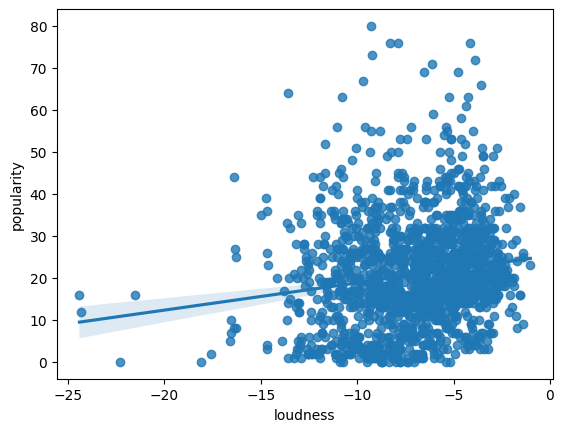

In [58]:
sns.regplot(x='loudness',y='popularity',data=spotifydatadf)

In [59]:
spotifydatadf['release_date']=pd.to_datetime(spotifydatadf['release_date'])

spotifydatadf['release_year']=spotifydatadf['release_date'].dt.year

In [60]:
spotifydatadf.columns

Index(['name', 'album', 'release_date', 'track_number', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms',
       'release_year'],
      dtype='object')

<Axes: xlabel='release_year', ylabel='popularity'>

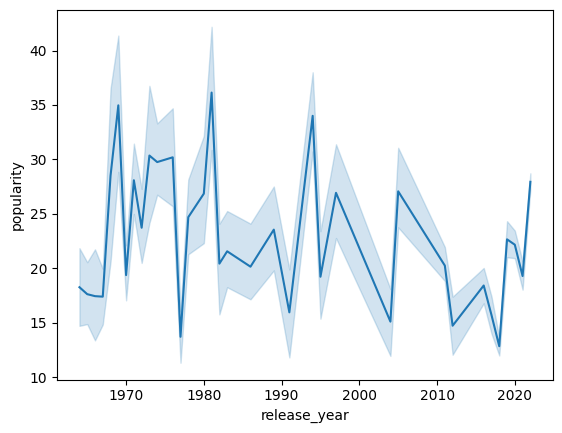

In [61]:
sns.lineplot(x='release_year',y='popularity',data=spotifydatadf)

<Axes: xlabel='release_year'>

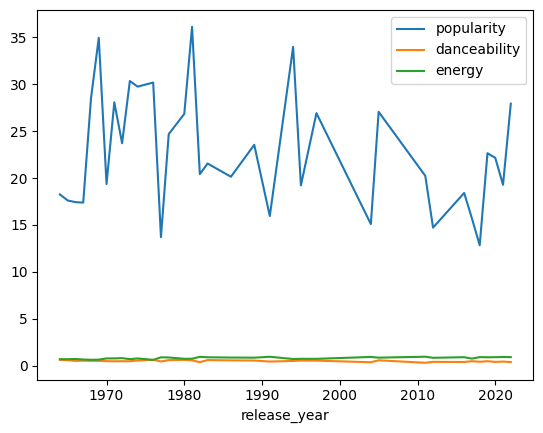

In [62]:
yearly=spotifydatadf.groupby('release_year').mean(numeric_only=True)
yearly[['popularity','danceability','energy']].plot()

Scaling numerical data using Standard SCaler

In [63]:
from sklearn.preprocessing import StandardScaler

In [66]:
numcols=numcols.drop(['track_number'],axis=1)

In [68]:
numcols_std_scale=StandardScaler().fit_transform(numcols)
numcols_std_scale=pd.DataFrame(numcols_std_scale,columns=numcols.columns)

In [71]:
objcols.columns

Index(['name', 'album', 'release_date'], dtype='object')

In [70]:
from sklearn.cluster import KMeans

In [72]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(numcols)
    wcss.append(kmeans.inertia_)

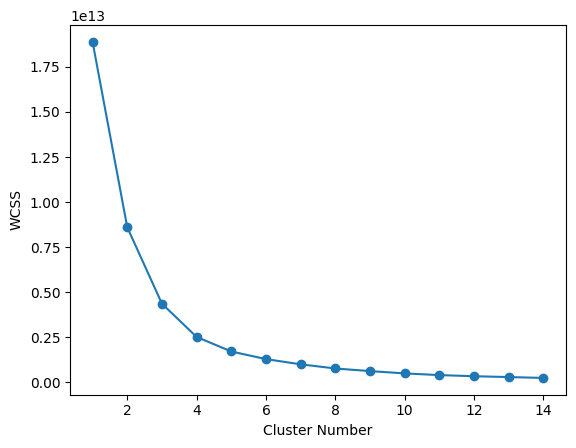

In [74]:
#Elbow Plot
plt.plot(range(1,15),wcss,marker='o')
plt.xlabel("Cluster Number")
plt.ylabel("WCSS")
plt.show()

There is no clear elbow point.It can be 3 or 4.Build models and use scatter plot or silhoutte score for finalizing cluster number or K value.

In [77]:
# Build final cluster model
clust_final=KMeans(n_clusters=4,random_state=42).fit(numcols)
X=numcols_std_scale
cluster_labels=clust_final.fit_predict(X)

In [78]:
spotifydatadf['cluster']=cluster_labels

In [80]:
spotifydatadf.groupby('cluster').mean(numeric_only=True)

track_number  acousticness  danceability    energy  instrumentalness  \
cluster                                                                         
0           10.383764      0.187251      0.354924  0.925397          0.154376   
1            7.860215      0.516562      0.452025  0.571595          0.075423   
2            7.540761      0.213205      0.588812  0.664043          0.180633   
3            7.771971      0.188110      0.521846  0.879523          0.221201   

         liveness  loudness  speechiness       tempo   valence  popularity  \
cluster                                                                      
0        0.841976 -5.470609     0.109492  138.458308  0.435791   16.892989   
1        0.329610 -9.007996     0.046693  109.832935  0.393235   25.548387   
2        0.235165 -9.901168     0.047998  122.729883  0.749935   15.111413   
3        0.372523 -4.993751     0.051971  123.847230  0.749166   27.610451   

           duration_ms  release_year  
cluster                               
0        307456.870849   2006.942804  
1        274845.422939   1984.526882  
2        187070.684783   1975.619565  
3        244157.332542   1991.061758

In [81]:
spotifydatadf['cluster'].value_counts().sort_index()

cluster
0    542
1    279
2    368
3    421
Name: count, dtype: int64

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca_95_var=PCA(n_components=0.95).fit(X)

In [84]:
pca_95_var.n_components_ 

np.int64(9)

In [86]:
X_pca_95_var=pca_95_var.transform(X)

In [87]:
print(X.shape)
print(X_pca_95_var.shape)

(1610, 11)
(1610, 9)


In [90]:
pca_scree=PCA(n_components=5)
X_pca_scree=pca_scree.fit(X)
X_pca_exp_var=np.cumsum(np.round(X_pca_scree.explained_variance_ratio_,4)*100)

<Figure size 1000x2000 with 0 Axes>

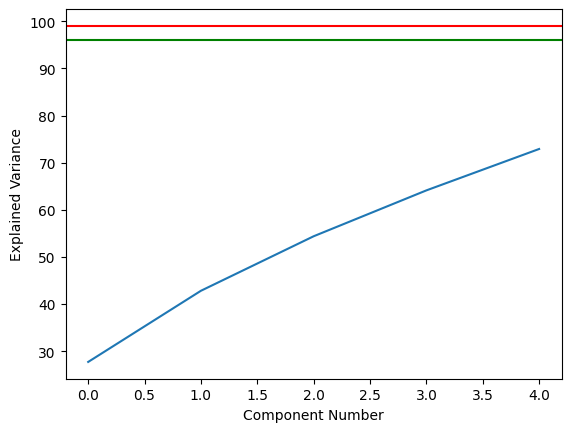

In [91]:
plt.figure(figsize=(10,20))
fig,ax=plt.subplots()
plt.plot(X_pca_exp_var)
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.axhline(y=99,color='Red')
plt.axhline(y=96,color='Green')

In [92]:
X_pca_exp_var


array([27.74, 42.83, 54.39, 64.12, 72.9 ])

In [94]:
X_pca_final=PCA(n_components=7).fit(X)
X_pca_final=X_pca_final.transform(X)
X_pca_final.shape

(1610, 7)